<a href="https://colab.research.google.com/github/YinGuoX/Deep_Learning_Pytorch_WithDeeplizard/blob/master/16_PyTorch_Datasets_And_DataLoaders_Training_Set_Exploration_For_Deep_Learning_And_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Datasets And DataLoaders For Deep Learning

我们在这篇文章中的目标是使自己适应使用数据集和数据加载器对象，并对我们的训练集有所了解。 事不宜迟，让我们开始吧。

从高角度来看，我们仍处于深度学习项目的准备数据阶段。

在这篇文章中，我们将看到如何使用在上一篇文章中创建的数据集和数据加载器对象。 请记住，在上一篇文章中，我们有两个PyTorch对象，一个Dataset和一个DataLoader。

* train_set

* train_loader

现在，我们准备看看如何使用这些对象，让我们开始吧。




In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
#from plotcm import plot_confusion_matrix

import pdb

torch.set_printoptions(linewidth=120)

In [ ]:
train_set = torchvision.datasets.FashionMNIST(root='./data',train=True,
                                download=True,
                                transform=transforms.Compose([
        transforms.ToTensor()
    ]))


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:479: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [ ]:
train_loader =torch.utils.data.DataLoader(train_set,batch_size=1000,shuffle=True)

## 1.PyTorch DataSet：使用train_set
让我们先来看一些可以执行的操作，以更好地了解我们的数据。

### 探索数据

要查看训练集中有多少张图片，我们可以使用Python len（）函数检查数据集的长度：

In [ ]:
len(train_set)

60000

根据我们在Fashion-MNIST数据集上的帖子中学到的知识，这个60000的数字是有意义的。 假设我们要查看每个图像的标签。 可以这样完成：

In [ ]:
train_set.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

他的第一个图像是9，接下来的两个是零。 请记住，过去的帖子中，这些值对实际的类名或标签进行编码。 例如，9是踝靴，而0是T恤。

如果要查看数据集中每个标签有多少个，可以使用PyTorch bincount（）函数，如下所示：

In [ ]:
train_set.targets.bincount()

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

### 类别不平衡：平衡和不平衡数据集

这向我们显示，Fashion-MNIST数据集在每个类别中的样本数量方面是统一的。 这意味着我们每个类别都有6000个样本。 结果，该数据集被认为是平衡的。 如果类的样本数量不同，我们将其称为不平衡数据集。

类不平衡是一个普遍的问题，但是在我们的案例中，我们刚刚看到Fashion-MNIST数据集确实是平衡的，因此我们不必为项目担心。

要了解有关减轻深度学习中不平衡数据集的方法的更多信息，请参阅本文：[卷积神经网络中类不平衡问题的系统研究](https://arxiv.org/abs/1710.05381)。

### 访问train_set中的数据

要访问训练集中的单个元素，我们首先将train_set对象传递给Python的iter（）内置函数，该函数返回一个代表数据流的对象。

对于数据流，我们可以使用Python内置的next（）函数来获取数据流中的下一个数据元素。 由此，我们希望得到一个样本，因此我们将相应地命名结果：

In [ ]:
sample=next(iter(train_set))
len(sample)

2

将sample传递给len（）函数后，我们可以看到sample包含两个项，这是因为数据集包含图像标签对。我们从train_set中检索的每个样本都包含作为张量的图像数据和作为张量的相应标签。

由于sample是sequence type，我们可以使用sequence unpacking来分配图像和标签。我们现在将检查图像和标签的类型，看看它们都是什么torch.Tensor物体：

In [ ]:
image,label = sample

In [ ]:
type(image)

torch.Tensor

In [ ]:
type(label)

int

我们将检查形状以确定图像是1 x 28 x 28张量，而标签是标量值张量：

In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
torch.tensor(label).shape

torch.Size([])

我们还将在图像上调用squeeze（）函数，以了解如何删除尺寸为1的尺寸

In [ ]:
image.squeeze().shape

torch.Size([28, 28])

同样，根据我们之前对Fashion-MNIST数据集的讨论，我们确实希望看到图像的28 x 28形状。 我们在张量的第一维上看到1的原因是因为需要表示通道数。 与具有3个颜色通道的RGB图像相反，灰度图像具有单个颜色通道。 这就是为什么我们有一个1 x 28 x 28张量的原因。 我们有1个颜色通道，尺寸为28 x 28。

现在让我们绘制图像，我们将首先了解为什么要压缩张量。：我们首先压缩张量，然后将其传递给imshow（）函数。

tensor(9)

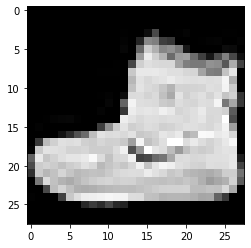

In [ ]:
plt.imshow(image.squeeze(),cmap='gray')
torch.tensor(label)

我们返回了脚踝靴和标签9。我们知道标签9代表脚踝靴，因为它是在上一篇文章中查看的论文中指定的。

好吧。 让我们看看现在如何使用数据加载器。

## 2.PyTorch DataLoader：处理大量数据
我们将首先创建一个新的数据加载器，其批处理大小较小，为10，因为更容易演示正在进行的操作：


In [ ]:
display_loader = torch.utils.data.DataLoader(train_set,batch_size=10)

我们从loader中得到一批数据集，就像我们在训练集中看到的一样。我们使用iter（）和next（）函数。

使用数DataLoader时需要注意一点。如果shuffle=True，则每次调用next时，批处理都将不同。当shuffle=True时，训练集中的第一个样本将在第一次调用next时返回。默认情况下，shuffle处于关闭状态。

In [ ]:
# note that each batch will be different when shuffle=True
batch = next(iter(display_loader))
print("len:",len(batch))

len: 2


检查返回批次的长度，我们得到2,就像训练集一样。 让我们打开批包装，看看两个张量及其形状：

In [ ]:
images,labels = batch
print("types:",type(images),type(labels))
print("shapes:",images.shape,labels.shape)

types: <class 'torch.Tensor'> <class 'torch.Tensor'>
shapes: torch.Size([10, 1, 28, 28]) torch.Size([10])


因为batch_size=10，我们知道我们处理的是一批10幅图像和10个相应的标签。这就是为什么我们在变量名上使用复数形式。

这些类型是我们期望的张量。但是，这些形状与我们在单个样本中看到的不同。我们没有使用单个标量值作为标签，而是使用一个具有10个值的秩1张量。包含图像数据的张量中每个维度的大小由以下每个值定义：
* (batch size, number of color channels, image height, image width)

批量大小为10，这就是为什么我们现在有一个10的主要维度的张量，一个索引为每个图像。下面是我们之前看到的第一只脚踝靴:

In [ ]:
images[0].shape

torch.Size([1, 28, 28])

In [ ]:
labels[0]

tensor(9)

要绘制一批图像，我们可以使用torchvision.utils.make_grid（）函数创建一个可以如下绘制的网格：

labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


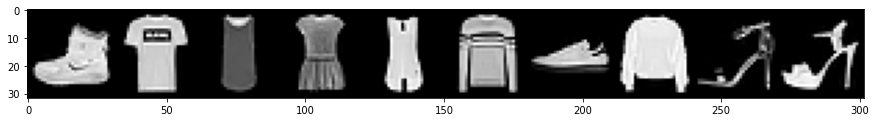

In [ ]:
grid = torchvision.utils.make_grid(images,nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid,(1,2,0)))
print("labels:",labels)

感谢Amit Chaudhary指出，可以使用permute（）PyTorch张量方法代替np.transpose（）。 就像这样：

labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


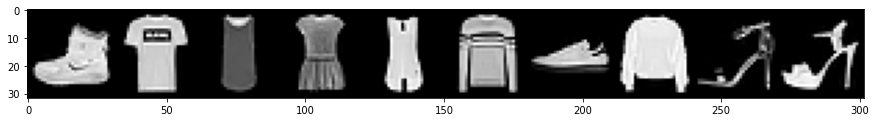

In [ ]:
grid = torchvision.utils.make_grid(images,nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(grid.permute(1,2,0))
print("labels:",labels)

## 3.如何使用PyTorch DataLoader绘制图像
这是使用PyTorch DataLoader绘制图像的另一种方法。 此方法的灵感来自Barry Mitchell。

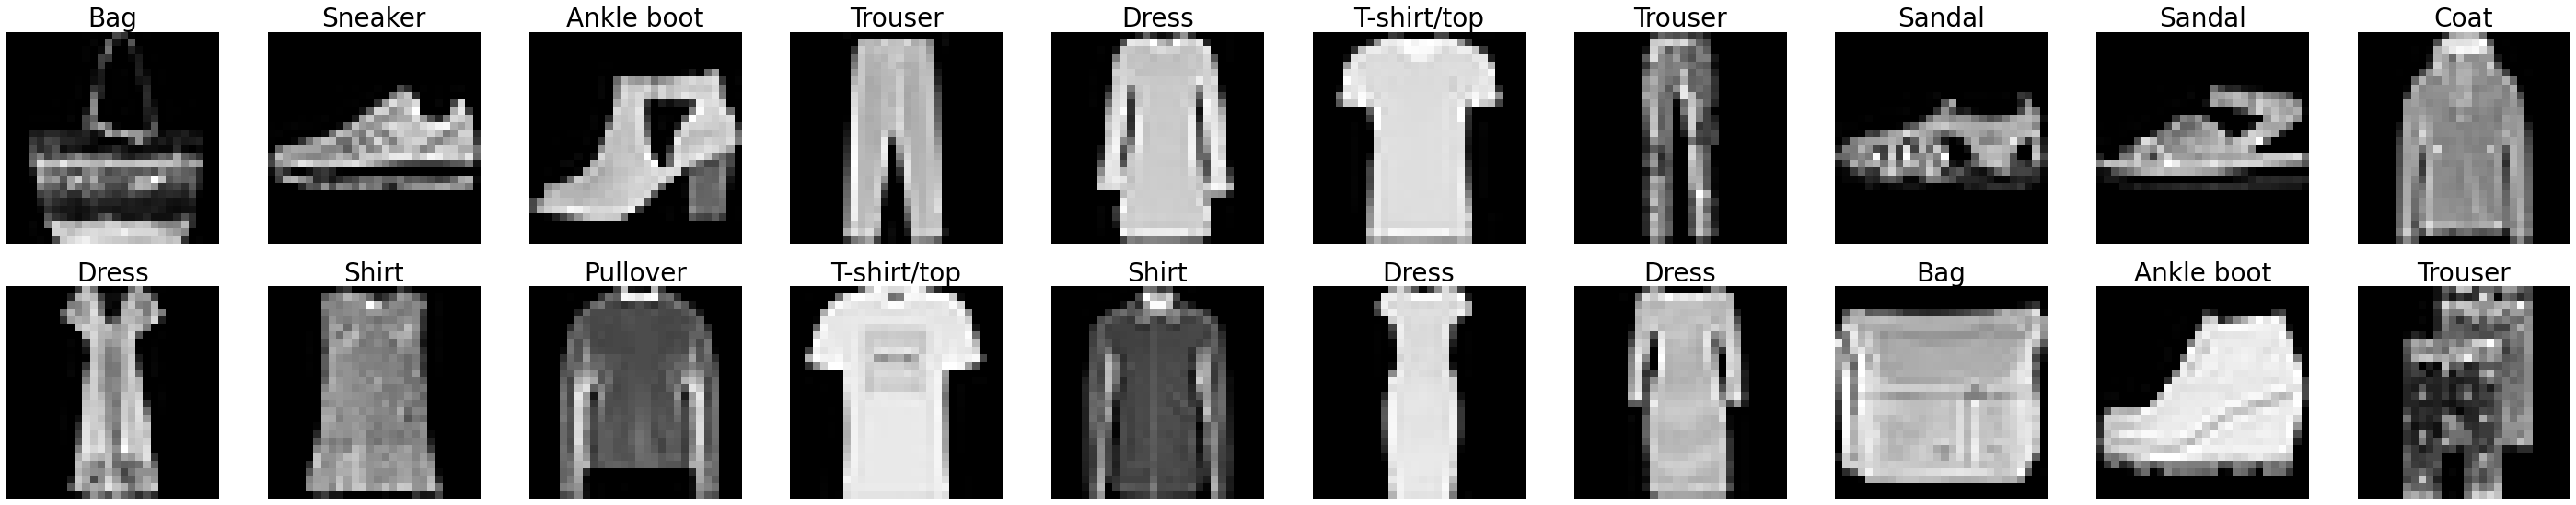

In [ ]:
how_many_to_plot = 20
train_loader = torch.utils.data.DataLoader(
    train_set,batch_size = 1,shuffle=True
)

plt.figure(figsize=(50,50))
for i ,batch in enumerate(train_loader,start=1):
  image,label=batch
  plt.subplot(10,10,i)
  plt.imshow(image.reshape(28,28),cmap='gray')
  plt.axis("off")
  plt.title(train_set.classes[label.item()],fontsize=28)
  if(i>=how_many_to_plot):
    break

plt.show()

下一步是构建模型

现在，我们应该对如何探索DataSet和DataLoader并与之交互有很好的了解。 当我们开始构建卷积神经网络和训练循环时，这两者都将被证明很重要。 实际上，数据加载器将直接在我们的训练循环中使用。